# Phase 3 Final Project

* Kevin Gross
* Part Time Flatiron Student

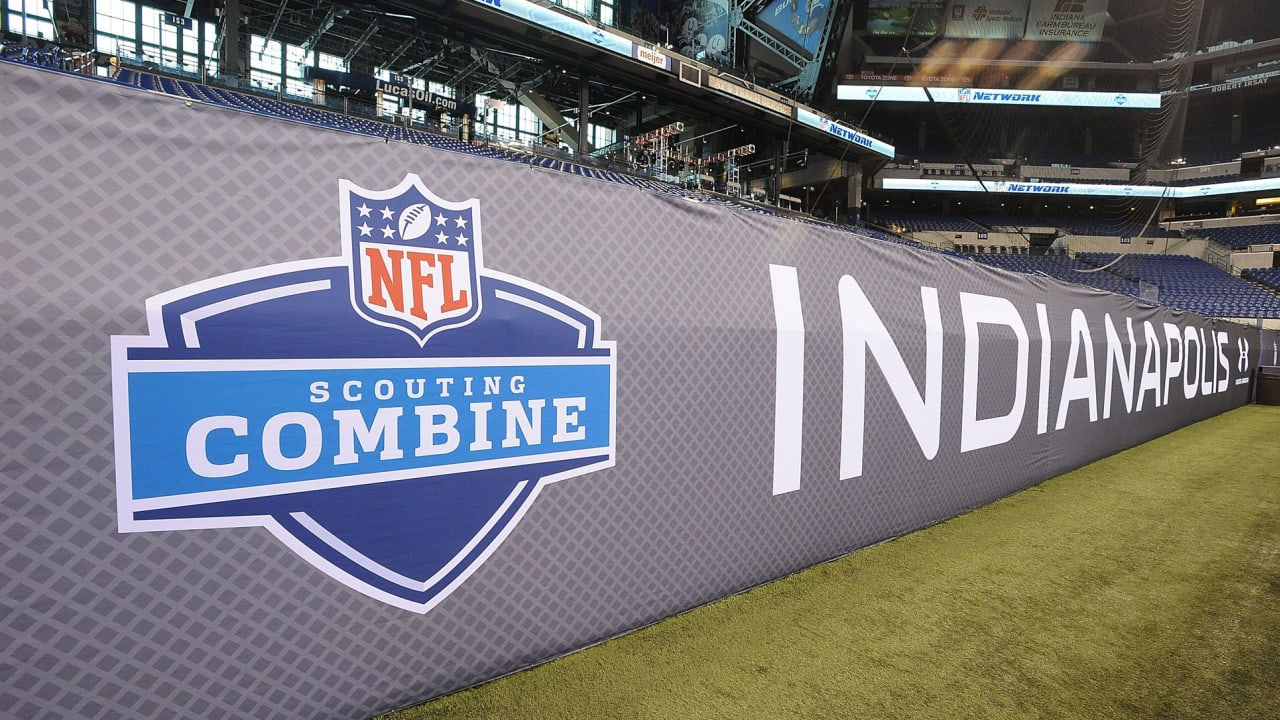

## NFL Combine Data Analysis

### General Overview

This project analyzes data from the NFL Scounting Combine from 2009 to 2019. 

The NFL Scouting Combine is a week-long showcase occurring every February at Lucas Oil Stadium in Indianapolis, where college football players perform physical and mental tests in front of National Football League coaches, general managers, and scouts. With increasing interest in the NFL Draft, the scouting combine has grown in scope and significance, allowing personnel directors to evaluate upcoming prospects in a standardized setting.

Athletes attend by invitation only. An athlete's performance during the combine can affect their draft status and salary, and ultimately their career. The draft has popularized the term "workout warrior", whereby an athlete's "draft stock" is increased based on superior measurable qualities such as size, speed, and strength, despite having an average or sub-par college career.

### Buisness Problem

**The stakeholders for this project are all 32 of the teams in the National Football League.** The analysis provided below can help guide NFL teams to make better decisions at the draft based purely on measureable stats.

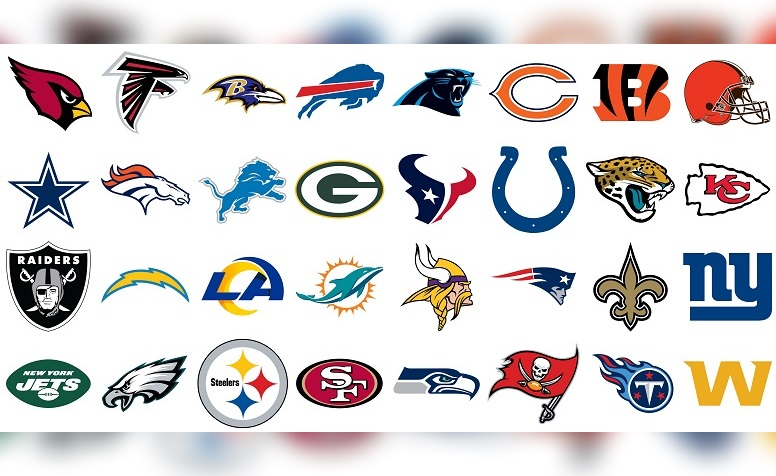

## Import the Necessary Packages and Load The Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, log_loss, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, plot_confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Combine The Datasets

The first task is to combine multiple datasets:

* NFL Combine
* College Football Player Names
* College Football Player Statistics
* College Football Teams

This will be done in a multi-step process:

### 1. Load all the player names who played college football from 2009 to 2013 and merge this information into one dataset.

In [2]:
players_09 = pd.read_csv('Data/cfbstats-com-2009/player.csv', usecols= [0, 1, 2, 3])
players_10 = pd.read_csv('Data/cfbstats-com-2010/player.csv', usecols= [0, 1, 2, 3])
players_11 = pd.read_csv('Data/cfbstats-com-2011/player.csv', usecols= [0, 1, 2, 3])
players_12 = pd.read_csv('Data/cfbstats-com-2012/player.csv', usecols= [0, 1, 2, 3])
players_13 = pd.read_csv('Data/cfbstats-com-2013/player.csv', usecols= [0, 1, 2, 3])

players_09.head()

,Player Code,Team Code,Last Name,First Name
0,1022870,5,Alexander,Bill
1,1022862,5,Alexander,Broderick
2,85455,5,Allen,Alex
3,1007928,5,Anderson,Jake
4,85458,5,Anderson,Zack


In [3]:
all_players = pd.concat([players_09, players_10, players_11, players_12, players_13])

print(all_players.shape)
all_players.head()

(104039, 4)


,Player Code,Team Code,Last Name,First Name
0,1022870,5,Alexander,Bill
1,1022862,5,Alexander,Broderick
2,85455,5,Allen,Alex
3,1007928,5,Anderson,Jake
4,85458,5,Anderson,Zack


In [4]:
all_players.drop_duplicates(inplace=True)

all_players.shape

(52593, 4)

### 2. Load all of the player's statistics from every college football game from 2009 to 2013 and merge into one dataset.

In [5]:
player_stats_09 = pd.read_csv('Data/cfbstats-com-2009/player-game-statistics.csv')
player_stats_10 = pd.read_csv('Data/cfbstats-com-2010/player-game-statistics.csv')
player_stats_11 = pd.read_csv('Data/cfbstats-com-2011/player-game-statistics.csv')
player_stats_12 = pd.read_csv('Data/cfbstats-com-2012/player-game-statistics.csv')
player_stats_13 = pd.read_csv('Data/cfbstats-com-2013/player-game-statistics.csv')

player_stats_09.head()

,Player Code,Game Code,Rush Att,Rush Yard,Rush TD,Pass Att,Pass Comp,Pass Yard,Pass TD,Pass Int,...,Tackle Solo,Tackle Assist,Tackle For Loss,Tackle For Loss Yard,Sack,Sack Yard,QB Hurry,Fumble Forced,Pass Broken Up,Kick/Punt Blocked
0,1022862,5050320091031,19,48,0,0,0,0,0,0,...,0,0,0.0,0,0.0,0,0,0,0,0
1,1022862,331000520091107,13,42,0,0,0,0,0,0,...,0,0,0.0,0,0.0,0,0,0,0,0
2,1022862,690000520091113,4,8,0,0,0,0,0,0,...,0,0,0.0,0,0.0,0,0,0,0,0
3,1022862,5007120091120,13,46,0,0,0,0,0,0,...,0,0,0.0,0,0.0,0,0,0,0,0
4,1022862,204000520091127,10,54,0,0,0,0,0,0,...,0,0,0.0,0,0.0,0,0,0,0,0


Since this data is on a per game basis, we can drop the `Game Code` column. We can then use `pd.concat` to get all of the players stats from 2009 to 2013 into one dataset.

In [6]:
all_players_stats = pd.concat([player_stats_09, player_stats_10, player_stats_11, player_stats_12, player_stats_13])

print(all_players_stats.shape)
all_players_stats.head()

(291928, 58)


,Player Code,Game Code,Rush Att,Rush Yard,Rush TD,Pass Att,Pass Comp,Pass Yard,Pass TD,Pass Int,...,Tackle Solo,Tackle Assist,Tackle For Loss,Tackle For Loss Yard,Sack,Sack Yard,QB Hurry,Fumble Forced,Pass Broken Up,Kick/Punt Blocked
0,1022862,5050320091031,19,48,0,0,0,0,0,0,...,0,0,0.0,0,0.0,0,0,0,0,0
1,1022862,331000520091107,13,42,0,0,0,0,0,0,...,0,0,0.0,0,0.0,0,0,0,0,0
2,1022862,690000520091113,4,8,0,0,0,0,0,0,...,0,0,0.0,0,0.0,0,0,0,0,0
3,1022862,5007120091120,13,46,0,0,0,0,0,0,...,0,0,0.0,0,0.0,0,0,0,0,0
4,1022862,204000520091127,10,54,0,0,0,0,0,0,...,0,0,0.0,0,0.0,0,0,0,0,0


In [7]:
all_players_stats.drop(columns='Game Code', axis=1, inplace=True)

### 3. Load all of the teams from college football.

In [8]:
team_names = pd.read_csv('Data/cfbstats-com-2009/team.csv')

team_names

,Team Code,Name,Conference Code
0,5,Akron,875
1,8,Alabama,911
2,9,UAB,24312
3,28,Arizona State,905
4,29,Arizona,905
...,...,...,...
240,1068,Elon,912
241,1092,Gardner-Webb,826
242,1320,Presbyterian,99005
243,2678,Ark.-Pine Bluff,916


### 4. Group the player's statistics by `Player Code` to sum up college football stats.

In [9]:
all_players_stats = all_players_stats.groupby('Player Code').sum().reset_index()

print(all_players_stats.shape)
all_players_stats.head()

(28605, 57)


,Player Code,Rush Att,Rush Yard,Rush TD,Pass Att,Pass Comp,Pass Yard,Pass TD,Pass Int,Pass Conv,...,Tackle Solo,Tackle Assist,Tackle For Loss,Tackle For Loss Yard,Sack,Sack Yard,QB Hurry,Fumble Forced,Pass Broken Up,Kick/Punt Blocked
0,4,0,0,0,0,0,0,0,0,0,...,1,0,0.0,0,0.0,0,0,0,0,0
1,6,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0.0,0,0,0,0,0
2,54,0,0,0,0,0,0,0,0,0,...,1,0,0.0,0,0.0,0,0,0,0,0
3,72,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0.0,0,0,0,0,0
4,116,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0.0,0,0,0,0,0


### 5. Merge our `team_names` dataset with the `all_players` dataset on `Team Code`.

We can use `Team Code` here because it is a unique identifer on each dataset. 

In [10]:
names_and_teams = pd.merge(team_names, all_players, on='Team Code')

print(names_and_teams.shape)
names_and_teams.head()

(51801, 6)


,Team Code,Name,Conference Code,Player Code,Last Name,First Name
0,5,Akron,875,1022870,Alexander,Bill
1,5,Akron,875,1022862,Alexander,Broderick
2,5,Akron,875,85455,Allen,Alex
3,5,Akron,875,1007928,Anderson,Jake
4,5,Akron,875,85458,Anderson,Zack


We now have a table that shows the school name with the player name.

### 6. Merge the `names_and_teams` dataset with our `all_players_stats` dataset.

We can use the `Player Code` here because it is a unique identifer on each dataset.

In [11]:
players_stats_with_names_teams = pd.merge(names_and_teams, all_players_stats, on='Player Code')

print(players_stats_with_names_teams.shape)
players_stats_with_names_teams.head()

(29312, 62)


,Team Code,Name,Conference Code,Player Code,Last Name,First Name,Rush Att,Rush Yard,Rush TD,Pass Att,...,Tackle Solo,Tackle Assist,Tackle For Loss,Tackle For Loss Yard,Sack,Sack Yard,QB Hurry,Fumble Forced,Pass Broken Up,Kick/Punt Blocked
0,5,Akron,875,1022870,Alexander,Bill,0,0,0,0,...,26,21,0.0,0,0.0,0,0,0,1,1
1,5,Akron,875,1022862,Alexander,Broderick,108,397,0,0,...,0,4,0.0,0,0.0,0,0,0,0,0
2,5,Akron,875,85455,Allen,Alex,245,1065,13,2,...,2,1,0.0,0,0.0,0,0,0,0,0
3,5,Akron,875,1007928,Anderson,Jake,0,0,0,0,...,1,0,0.0,0,0.0,0,0,0,0,0
4,5,Akron,875,85458,Anderson,Zack,0,0,0,0,...,0,0,0.0,0,0.0,0,0,0,0,0


In [12]:
# Drop unncessary columns
players_stats_with_names_teams.drop(columns=['Player Code', 'Team Code', 'Conference Code'], axis=1, inplace=True)

players_stats_with_names_teams.head()

,Name,Last Name,First Name,Rush Att,Rush Yard,Rush TD,Pass Att,Pass Comp,Pass Yard,Pass TD,...,Tackle Solo,Tackle Assist,Tackle For Loss,Tackle For Loss Yard,Sack,Sack Yard,QB Hurry,Fumble Forced,Pass Broken Up,Kick/Punt Blocked
0,Akron,Alexander,Bill,0,0,0,0,0,0,0,...,26,21,0.0,0,0.0,0,0,0,1,1
1,Akron,Alexander,Broderick,108,397,0,0,0,0,0,...,0,4,0.0,0,0.0,0,0,0,0,0
2,Akron,Allen,Alex,245,1065,13,2,2,93,1,...,2,1,0.0,0,0.0,0,0,0,0,0
3,Akron,Anderson,Jake,0,0,0,0,0,0,0,...,1,0,0.0,0,0.0,0,0,0,0,0
4,Akron,Anderson,Zack,0,0,0,0,0,0,0,...,0,0,0.0,0,0.0,0,0,0,0,0


In [13]:
# Rename column header to make more sense
players_stats_with_names_teams.rename(columns={'Name': 'School Name'}, inplace=True)

print(players_stats_with_names_teams.shape)
players_stats_with_names_teams.head()

(29312, 59)


,School Name,Last Name,First Name,Rush Att,Rush Yard,Rush TD,Pass Att,Pass Comp,Pass Yard,Pass TD,...,Tackle Solo,Tackle Assist,Tackle For Loss,Tackle For Loss Yard,Sack,Sack Yard,QB Hurry,Fumble Forced,Pass Broken Up,Kick/Punt Blocked
0,Akron,Alexander,Bill,0,0,0,0,0,0,0,...,26,21,0.0,0,0.0,0,0,0,1,1
1,Akron,Alexander,Broderick,108,397,0,0,0,0,0,...,0,4,0.0,0,0.0,0,0,0,0,0
2,Akron,Allen,Alex,245,1065,13,2,2,93,1,...,2,1,0.0,0,0.0,0,0,0,0,0
3,Akron,Anderson,Jake,0,0,0,0,0,0,0,...,1,0,0.0,0,0.0,0,0,0,0,0
4,Akron,Anderson,Zack,0,0,0,0,0,0,0,...,0,0,0.0,0,0.0,0,0,0,0,0


Our dataset is now has every player's stats in college football summed up from 2009 to 2013. We should be able to merge this data with our combine data. As with the last notebook, we will clean up our NFL Combine data and look to merge the two tables.

In [14]:
combine_data = pd.read_csv('Data/NFL.csv')

In [15]:
display(combine_data.head())
print(combine_data.shape)

,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted
0,2009,Beanie Wells\WellCh00,20.0,Ohio St.,1.8542,106.594207,4.38,85.09,25.0,325.12,NaN,NaN,Arizona Cardinals / 1st / 31st pick / 2009,31.004194,offense,backs_receivers,RB,Yes
1,2009,Will Davis\DaviWi99,22.0,Illinois,1.8796,118.387609,4.84,83.82,27.0,292.10,7.38,4.45,Arizona Cardinals / 6th / 204th pick / 2009,33.510073,defense,defensive_lineman,DE,Yes
2,2009,Herman Johnson\JohnHe23,24.0,LSU,2.0066,165.107623,5.50,NaN,21.0,NaN,NaN,NaN,Arizona Cardinals / 5th / 167th pick / 2009,41.005821,offense,offensive_lineman,OG,Yes
3,2009,Rashad Johnson\JohnRa98,23.0,Alabama,1.8034,92.079251,4.49,93.98,15.0,304.80,7.09,4.23,Arizona Cardinals / 3rd / 95th pick / 2009,28.312463,defense,defensive_back,FS,Yes
4,2009,Cody Brown\BrowCo96,22.0,Connecticut,1.8796,110.676538,4.76,92.71,26.0,304.80,7.10,4.40,Arizona Cardinals / 2nd / 63rd pick / 2009,31.327425,defense,line_backer,OLB,Yes


(3477, 18)


Right off the bat, we can see that we have almost 3,500 rows, each with 17 feature columns and 1 target column:

* `Year`: Year of attendance at the NFL combine
* `Player`: Player name
* `Age`: Players age (years)
* `School`: College attended
* `Height`: Height (meters)
* `Weight`: Weight (kilograms)
* `Sprint_40yd`: 40 yard sprint time (seconds)
* `Vertical_Jump`: Vertical jump result (centimeters) 
* `Bench_Press_Reps`: Maximum bench press repetitions achieved while lifting 102.1 kg (225 lb) weight
* `Broad_Jump`: Broad jump result (centimeters)
* `Agility_3cone`: Three-cone agility test time (seconds)
* `Shuttle`: Lateral shuttle time (seconds)
* `Drafted..tm.rnd.yr.`: Team the athlete was drafted by, draft round, draft pick, and year
* `BMI`: Body mass index (kg/m2)
* `Player_Type`: Offensive or defensive player or special teams
* `Position_Type`: Broad classification of the athlete's playing position
* `Position`: Playing position
* `Drafted`: Was the player drafted during the NFL draft?

This is a fairly balanced dataset, with 65% of the combine attendees drafted and 35% not drafted.

In [16]:
print("Raw Counts")
print(combine_data['Drafted'].value_counts())
print()
print("Percentages")
print(combine_data['Drafted'].value_counts(normalize=True))

Raw Counts
Yes    2254
No     1223
Name: Drafted, dtype: int64

Percentages
Yes    0.64826
No     0.35174
Name: Drafted, dtype: float64


## Cleaning of Combine Data

In [17]:
# Check for missing values
combine_data.isna().sum()

Year                      0
Player                    0
Age                     550
School                    0
Height                    0
Weight                    0
Sprint_40yd             174
Vertical_Jump           697
Bench_Press_Reps        905
Broad_Jump              728
Agility_3cone          1217
Shuttle                1140
Drafted..tm.rnd.yr.    1223
BMI                       0
Player_Type               0
Position_Type             0
Position                  0
Drafted                   0
dtype: int64

We can see here that we are missing a good amount of records for a few important columns. In our last notebook, we dropped `Drafted..tm.rnd.yr.`, `Position_Type`, and `Player`. However, here we will need the `Player` column in order to merge our two datasets so we will keep it in this circumstance. 

In [18]:
combine_data.drop(columns=['Drafted..tm.rnd.yr.', 'Position_Type'], axis=1, inplace=True)

In [19]:
# Confirm that the columns were dropped
combine_data.isna().sum()

Year                   0
Player                 0
Age                  550
School                 0
Height                 0
Weight                 0
Sprint_40yd          174
Vertical_Jump        697
Bench_Press_Reps     905
Broad_Jump           728
Agility_3cone       1217
Shuttle             1140
BMI                    0
Player_Type            0
Position               0
Drafted                0
dtype: int64

Next, let's try to fill in the 550 missing values in the `Age` column.

In [20]:
combine_data['Age'].describe()

count    2927.000000
mean       21.983259
std         0.969490
min        18.000000
25%        21.000000
50%        22.000000
75%        23.000000
max        28.000000
Name: Age, dtype: float64

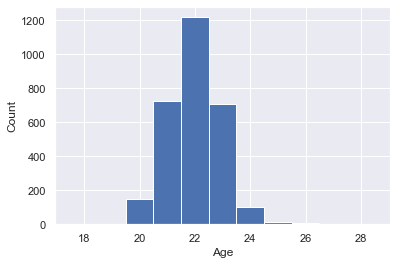

In [21]:
sns.set(style="darkgrid")

sns.histplot(data=combine_data, x="Age", discrete=True, alpha=1.0);

Since age appears to have a Gaussian distribution, let's fill in the blank age ranges using a normal distribution.

In [22]:
# Set a random seed for reproducibility
np.random.seed(8)

# Pull out the index of every row that has NA for 'Age'
index = combine_data[combine_data['Age'].isna()].index

# Use a normal distribution to get random ages based around the mean and standard deviation
value = np.random.normal(loc=combine_data['Age'].mean(), scale=combine_data['Age'].std(), 
                         size=combine_data['Age'].isna().sum())

# Round to the nearest whole number
value = value.round(0)

# Fill in the missing indicies using our randomly generated values
combine_data['Age'].fillna(pd.Series(value, index=index), inplace=True)

In [23]:
combine_data['Age'].describe()

count    3477.000000
mean       21.985045
std         0.980128
min        18.000000
25%        21.000000
50%        22.000000
75%        23.000000
max        28.000000
Name: Age, dtype: float64

In [24]:
# Confirm that it worked
combine_data.isna().sum()

Year                   0
Player                 0
Age                    0
School                 0
Height                 0
Weight                 0
Sprint_40yd          174
Vertical_Jump        697
Bench_Press_Reps     905
Broad_Jump           728
Agility_3cone       1217
Shuttle             1140
BMI                    0
Player_Type            0
Position               0
Drafted                0
dtype: int64

We still have missing values for 6 other columns: `Sprint_40yd`, `Vertical_Jump`, `Bench_Press_Reps`, `Broad_Jump`, `Agility_3cone`, and `Shuttle`.

### Adding Missing Data

We will use Scikit-Learn's tool called Iterative Imputer. From SciKit Learn's docstring:

> "Multivariate imputer that estimates each feature from all the others. A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion."

Let's pull out the columns that are missing data and fit and transform those columns using the Iterative Imputer.

In [25]:
missing = combine_data[['Sprint_40yd', 'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump',
       'Agility_3cone', 'Shuttle']]
missing

,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle
0,4.38,85.09,25.0,325.12,NaN,NaN
1,4.84,83.82,27.0,292.10,7.38,4.45
2,5.50,NaN,21.0,NaN,NaN,NaN
3,4.49,93.98,15.0,304.80,7.09,4.23
4,4.76,92.71,26.0,304.80,7.10,4.40
...,...,...,...,...,...,...
3472,4.48,95.25,11.0,NaN,NaN,NaN
3473,4.51,100.33,13.0,325.12,NaN,NaN
3474,4.47,100.33,15.0,342.90,6.82,4.14
3475,4.51,82.55,18.0,292.10,7.21,4.19


In [26]:
iter_imp = IterativeImputer(random_state=8)

iter_imp.fit(missing)

missing = iter_imp.transform(missing)

C:\Users\kevgr\anaconda3\envs\learn-env\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [27]:
missing = pd.DataFrame(missing, columns=['Sprint_40yd', 'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump',
       'Agility_3cone', 'Shuttle']).round(2)

In [28]:
combine_data.drop(columns=['Sprint_40yd', 'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump',
       'Agility_3cone', 'Shuttle'], axis=1, inplace=True)

In [29]:
cleaned_df = pd.concat([combine_data, missing], axis=1)
cleaned_df

,Year,Player,Age,School,Height,Weight,BMI,Player_Type,Position,Drafted,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle
0,2009,Beanie Wells\WellCh00,20.0,Ohio St.,1.8542,106.594207,31.004194,offense,RB,Yes,4.38,85.09,25.00,325.12,6.88,4.17
1,2009,Will Davis\DaviWi99,22.0,Illinois,1.8796,118.387609,33.510073,defense,DE,Yes,4.84,83.82,27.00,292.10,7.38,4.45
2,2009,Herman Johnson\JohnHe23,24.0,LSU,2.0066,165.107623,41.005821,offense,OG,Yes,5.50,62.50,21.00,243.23,7.97,4.88
3,2009,Rashad Johnson\JohnRa98,23.0,Alabama,1.8034,92.079251,28.312463,defense,FS,Yes,4.49,93.98,15.00,304.80,7.09,4.23
4,2009,Cody Brown\BrowCo96,22.0,Connecticut,1.8796,110.676538,31.327425,defense,OLB,Yes,4.76,92.71,26.00,304.80,7.10,4.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,2019,Xavier Crawford,21.0,Central Michigan,1.8034,84.821773,26.080939,defense,CB,No,4.48,95.25,11.00,315.55,6.84,4.15
3473,2019,Jordan Brown,24.0,South Dakota St.,1.8288,91.172066,27.260221,defense,CB,No,4.51,100.33,13.00,325.12,6.84,4.15
3474,2019,Corey Ballentine,24.0,Washburn,1.8034,88.904105,27.336171,defense,CB,No,4.47,100.33,15.00,342.90,6.82,4.14
3475,2019,Ugo Amadi,22.0,Oregon,1.7526,90.264882,29.386861,defense,S,No,4.51,82.55,18.00,292.10,7.21,4.19


In [30]:
# Confirm that it worked
cleaned_df.isna().sum()

Year                0
Player              0
Age                 0
School              0
Height              0
Weight              0
BMI                 0
Player_Type         0
Position            0
Drafted             0
Sprint_40yd         0
Vertical_Jump       0
Bench_Press_Reps    0
Broad_Jump          0
Agility_3cone       0
Shuttle             0
dtype: int64

In [31]:
cleaned_df.head()

,Year,Player,Age,School,Height,Weight,BMI,Player_Type,Position,Drafted,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle
0,2009,Beanie Wells\WellCh00,20.0,Ohio St.,1.8542,106.594207,31.004194,offense,RB,Yes,4.38,85.09,25.0,325.12,6.88,4.17
1,2009,Will Davis\DaviWi99,22.0,Illinois,1.8796,118.387609,33.510073,defense,DE,Yes,4.84,83.82,27.0,292.10,7.38,4.45
2,2009,Herman Johnson\JohnHe23,24.0,LSU,2.0066,165.107623,41.005821,offense,OG,Yes,5.50,62.50,21.0,243.23,7.97,4.88
3,2009,Rashad Johnson\JohnRa98,23.0,Alabama,1.8034,92.079251,28.312463,defense,FS,Yes,4.49,93.98,15.0,304.80,7.09,4.23
4,2009,Cody Brown\BrowCo96,22.0,Connecticut,1.8796,110.676538,31.327425,defense,OLB,Yes,4.76,92.71,26.0,304.80,7.10,4.40


As we can see above, our `Player` column needs a bit of cleaning. The below cell helps break it out.

In [32]:
cleaned_df['Player'] = cleaned_df['Player'].str.split('\\', expand=True)

cleaned_df['Last_Name'] = cleaned_df['Player'].str.split(' ', expand=True)[1]
cleaned_df['First_Name'] = cleaned_df['Player'].str.split(' ', expand=True)[0]

print(cleaned_df.shape)
cleaned_df.head()

(3477, 18)


,Year,Player,Age,School,Height,Weight,BMI,Player_Type,Position,Drafted,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Last_Name,First_Name
0,2009,Beanie Wells,20.0,Ohio St.,1.8542,106.594207,31.004194,offense,RB,Yes,4.38,85.09,25.0,325.12,6.88,4.17,Wells,Beanie
1,2009,Will Davis,22.0,Illinois,1.8796,118.387609,33.510073,defense,DE,Yes,4.84,83.82,27.0,292.10,7.38,4.45,Davis,Will
2,2009,Herman Johnson,24.0,LSU,2.0066,165.107623,41.005821,offense,OG,Yes,5.50,62.50,21.0,243.23,7.97,4.88,Johnson,Herman
3,2009,Rashad Johnson,23.0,Alabama,1.8034,92.079251,28.312463,defense,FS,Yes,4.49,93.98,15.0,304.80,7.09,4.23,Johnson,Rashad
4,2009,Cody Brown,22.0,Connecticut,1.8796,110.676538,31.327425,defense,OLB,Yes,4.76,92.71,26.0,304.80,7.10,4.40,Brown,Cody


Since our combine dataset runs 2009 to 2019, we know that a lot of the values will not be valid in our `players_stats_with_names_teams` dataset as that only has data from 2009 to 2013. Let's see how many people attended the combine between 2009 to 2013.

In [33]:
len(cleaned_df[cleaned_df['Year'].between(2009,2013)])

1638

## Merge the Two Datasets

We are going to merge the cleaned NFL Combine dataset with our Players Stats and Team Name dataset. Although there is no unique identifer across these two datasets, we can merge them on `Last Name`, `School`, and `First Name` as all 3 of those columns are in each dataset.

In [34]:
new_df = pd.merge(cleaned_df, players_stats_with_names_teams, left_on=['Last_Name', 'School', 'First_Name'], 
         right_on=['Last Name', 'School Name', 'First Name'], how='inner')

print(new_df.shape)
new_df.head()

(1721, 77)


,Year,Player,Age,School,Height,Weight,BMI,Player_Type,Position,Drafted,...,Tackle Solo,Tackle Assist,Tackle For Loss,Tackle For Loss Yard,Sack,Sack Yard,QB Hurry,Fumble Forced,Pass Broken Up,Kick/Punt Blocked
0,2010,Andre Roberts,22.0,Citadel,1.8034,88.450512,27.196701,offense,WR,Yes,...,0,0,0.0,0,0.0,0,0,0,0,0
1,2010,Daryl Washington,23.0,TCU,1.8796,104.326245,29.529949,defense,OLB,Yes,...,68,41,11.0,32,2.0,13,1,0,1,0
2,2010,Jim Dray,23.0,Stanford,1.9558,111.583723,29.171043,offense,TE,Yes,...,1,0,0.0,0,0.0,0,0,0,0,0
3,2010,Dan Williams,22.0,Tennessee,1.8796,148.324705,41.983885,defense,DT,Yes,...,36,34,9.0,31,2.5,21,9,0,0,0
4,2010,O'Brien Schofield,22.0,Wisconsin,1.8796,100.243914,28.374430,defense,OLB,Yes,...,43,19,24.5,126,12.0,80,8,3,1,0


In [35]:
print(new_df['Drafted'].value_counts())
new_df['Drafted'].value_counts(normalize=True)

Yes    1170
No      551
Name: Drafted, dtype: int64


Yes    0.679837
No     0.320163
Name: Drafted, dtype: float64

In [36]:
# Drop unneccesary columns
new_df.drop(columns=['Player', 'School Name', 'Last_Name', 'First_Name'], axis=1, inplace=True)

We are almost there! Next we need to change the `School`, `Position`, and `Drafted` columns into one-hot numeric arrays.

In [37]:
dummy_col = new_df[['School', 'Position', 'Drafted']]

dummy_df = pd.get_dummies(dummy_col, drop_first=True)

In [38]:
final_clean_df = pd.merge(new_df, dummy_df, how='left', left_index=True, right_index=True)

final_clean_df.head()

,Year,Age,School,Height,Weight,BMI,Player_Type,Position,Drafted,Sprint_40yd,...,Position_OG,Position_OLB,Position_OT,Position_P,Position_QB,Position_RB,Position_SS,Position_TE,Position_WR,Drafted_Yes
0,2010,22.0,Citadel,1.8034,88.450512,27.196701,offense,WR,Yes,4.40,...,0,0,0,0,0,0,0,0,1,1
1,2010,23.0,TCU,1.8796,104.326245,29.529949,defense,OLB,Yes,4.58,...,0,1,0,0,0,0,0,0,0,1
2,2010,23.0,Stanford,1.9558,111.583723,29.171043,offense,TE,Yes,4.82,...,0,0,0,0,0,0,0,1,0,1
3,2010,22.0,Tennessee,1.8796,148.324705,41.983885,defense,DT,Yes,5.19,...,0,0,0,0,0,0,0,0,0,1
4,2010,22.0,Wisconsin,1.8796,100.243914,28.374430,defense,OLB,Yes,4.63,...,0,1,0,0,0,0,0,0,0,1


In [39]:
print(final_clean_df.columns.tolist())

['Year', 'Age', 'School', 'Height', 'Weight', 'BMI', 'Player_Type', 'Position', 'Drafted', 'Sprint_40yd', 'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump', 'Agility_3cone', 'Shuttle', 'Last Name', 'First Name', 'Rush Att', 'Rush Yard', 'Rush TD', 'Pass Att', 'Pass Comp', 'Pass Yard', 'Pass TD', 'Pass Int', 'Pass Conv', 'Rec', 'Rec Yards', 'Rec TD', 'Kickoff Ret', 'Kickoff Ret Yard', 'Kickoff Ret TD', 'Punt Ret', 'Punt Ret Yard', 'Punt Ret TD', 'Fum Ret', 'Fum Ret Yard', 'Fum Ret TD', 'Int Ret', 'Int Ret Yard', 'Int Ret TD', 'Misc Ret', 'Misc Ret Yard', 'Misc Ret TD', 'Field Goal Att', 'Field Goal Made', 'Off XP Kick Att', 'Off XP Kick Made', 'Off 2XP Att', 'Off 2XP Made', 'Def 2XP Att', 'Def 2XP Made', 'Safety', 'Points', 'Punt', 'Punt Yard', 'Kickoff', 'Kickoff Yard', 'Kickoff Touchback', 'Kickoff Out-Of-Bounds', 'Kickoff Onside', 'Fumble', 'Fumble Lost', 'Tackle Solo', 'Tackle Assist', 'Tackle For Loss', 'Tackle For Loss Yard', 'Sack', 'Sack Yard', 'QB Hurry', 'Fumble Forced', 'Pass

In [40]:
final_clean_df.drop(columns=['Last Name', 'First Name', 'Player_Type', 'School', 
                             'Position', 'Drafted'], 
                    axis=1, 
                    inplace=True)

print(final_clean_df.shape)
final_clean_df.head()

(1721, 199)


,Year,Age,Height,Weight,BMI,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,...,Position_OG,Position_OLB,Position_OT,Position_P,Position_QB,Position_RB,Position_SS,Position_TE,Position_WR,Drafted_Yes
0,2010,22.0,1.8034,88.450512,27.196701,4.40,91.44,15.00,304.80,6.77,...,0,0,0,0,0,0,0,0,1,1
1,2010,23.0,1.8796,104.326245,29.529949,4.58,78.74,17.00,289.56,7.06,...,0,1,0,0,0,0,0,0,0,1
2,2010,23.0,1.9558,111.583723,29.171043,4.82,81.12,17.00,287.41,7.25,...,0,0,0,0,0,0,0,1,0,1
3,2010,22.0,1.8796,148.324705,41.983885,5.19,81.28,27.00,243.84,7.88,...,0,0,0,0,0,0,0,0,0,1
4,2010,22.0,1.8796,100.243914,28.374430,4.63,86.78,18.77,299.78,7.08,...,0,1,0,0,0,0,0,0,0,1


# Modeling

We are going to try multiple iterations of models in order to maximize our accuracy.

### Logistic Regression - [Documentation Here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set. A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables.

### K-Nearest Neighbors - [Documentation Here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

This algorithm — unlike linear models or tree-based models — does not emphasize learning the relationship between the features and the target. Instead, for a given test record, it finds the most similar records in the training set and returns an average of their target values.

### Decision Trees - [Documentation Here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

Similar to linear models (and unlike kNN), this algorithm emphasizes learning the relationship between the features and the target. However, unlike a linear model that tries to find linear relationships between each of the features and the target, decision trees look for ways to split the data based on features to decrease the entropy of the target in each split.

### Random Forest - [Documentation Here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

# Steps to Perform

Now that we have a cleaned dataframe (`final_clean_df`), we can go ahead and start creating our models that can predict whether or not a player was drafted. The steps we are going to follow are below:

### 1. Prepare the Data for Modeling
### 2. Build and Evaluate a Baseline Logistic Regression Model
### 3. Build and Evaluate Additional Logistic Regression Models
### 4. Build a Baseline kNN Model
### 5. Build Iterative Models to Find the Best kNN Model
### 6. Build a Baseline Decision Tree Model
### 7. Build Iterative Models to Find the Best Decision Tree Model
### 8. Build a Baseline Random Forest Model
### 9. Build Iterative Models to Find the Best Random Forest Model
### 10. Choose and Evaluate an Overall Best Model

## 1. Prepare the Data for Modeling
In the cell below, we will use the variable `final_clean_df` in order to create X and y, then training and test sets using `train_test_split` [(documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). We will use a `random_state` of 8 to ensure repeatability.

In [41]:
# Split df into X and y
X = final_clean_df.drop(columns='Drafted_Yes', axis=1)
y = final_clean_df['Drafted_Yes']

# Perform train-test split with random_state=8
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8, stratify=y)

Let's take a look to see if we have roughly equal percentages of drafted vs. not drafted in our train vs. test targets:

In [42]:
print("Train percent drafted vs. undrafted:", y_train.value_counts(normalize=True)[1])
print("Test percent drafted vs undrafted: ", y_test.value_counts(normalize=True)[1])

Train percent drafted vs. undrafted: 0.6798449612403101
Test percent drafted vs undrafted:  0.679814385150812


Now, we are going to instantiate a `StandardScaler`, fit it on `X_train`, and create new variables `X_train_scaled` and `X_test_scaled` containing values transformed with the scaler.

In [43]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 2. Build and Evaluate a Baseline Model
Using scikit-learn's `LogisticRegression` model, we will instantiate a classifier with `random_state=8`. We will then use cross_val_score with `scoring="neg_log_loss"` to find the average cross-validated log loss for this model on `X_train` and `y_train`.

* [`LogisticRegression` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [`cross_val_score` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

(Similar to RMSE, the internal implementation of `cross_val_score` requires that we use "negative log loss" instead of just log loss.)

In [44]:
# Instantiate a LogisticRegression with random_state=8
baseline_model = LogisticRegression(random_state=8)

# Fit our model
baseline_model.fit(X_train_scaled, y_train)

C:\Users\kevgr\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=8)

### Create Functions

The below functions will be used throughout our notebook to help with our modeling.

In [45]:
# Create a function that can show how our models do throughout the notebook
def print_metrics(model, X_train, y_train, X_test, y_test):
    
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)    
    
    print('Training Precision: ', precision_score(y_train, y_hat_train))
    print('Testing Precision: ', precision_score(y_test, y_hat_test))
    print('\n')

    print('Training Recall: ', recall_score(y_train, y_hat_train))
    print('Testing Recall: ', recall_score(y_test, y_hat_test))
    print('\n')

    print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
    print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
    print('\n')

    print('Training F1-Score: ', f1_score(y_train, y_hat_train))
    print('Testing F1-Score: ', f1_score(y_test, y_hat_test))
    
    print('\n')
    print('Classification Report:', '\n', classification_report(y_test, y_hat_test))
    
    plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
    plt.title(model)
    plt.show()

In [46]:
def create_grid(model, X_test, y_test, model_name=None):
    
    y_hat_test = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_hat_test)
    pre = precision_score(y_test, y_hat_test)
    rec = recall_score(y_test, y_hat_test)
    f1 = f1_score(y_test, y_hat_test)
    
    data = [[model_name, acc, pre, rec, f1]]
    
    df = pd.DataFrame(data=data, 
                          columns=['Model Name', 'Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score'])
    
    return df

In [47]:
def add_grid(model, X_test, y_test, dataframe=None, model_name=None):
    
    y_hat_test = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_hat_test)
    pre = precision_score(y_test, y_hat_test)
    rec = recall_score(y_test, y_hat_test)
    f1 = f1_score(y_test, y_hat_test)
    
    data = [[model_name, acc, pre, rec, f1]]
    
    df = pd.DataFrame(data=data, 
                          columns=['Model Name', 'Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score'])
    
    new_line = dataframe.append(df)
    
    return new_line

Training Precision:  0.81511746680286
Testing Precision:  0.7576687116564417


Training Recall:  0.9099201824401368
Testing Recall:  0.8430034129692833


Training Accuracy:  0.7984496124031008
Testing Accuracy:  0.7099767981438515


Training F1-Score:  0.8599137931034483
Testing F1-Score:  0.7980613893376414


Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.43      0.49       138
           1       0.76      0.84      0.80       293

    accuracy                           0.71       431
   macro avg       0.66      0.64      0.64       431
weighted avg       0.69      0.71      0.70       431



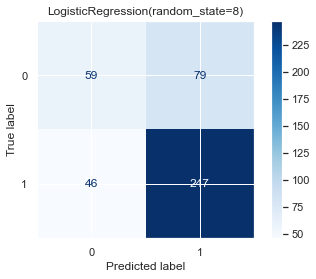

In [48]:
print_metrics(baseline_model, X_train_scaled, y_train, X_test_scaled, y_test)

In [56]:
log_reg = create_grid(baseline_model, X_test_scaled, y_test, model_name='Baseline LogReg')

log_reg

,Model Name,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Baseline LogReg,0.709977,0.757669,0.843003,0.798061


**Right off the bat we can see that our vanilla logistic regression model is better than the one from the previous notebook.** Not only that, but this model outperformed *all* of the models we created using just the combine data.

* Vanilla Logistic Regression Model With Combine Data: Accuracy Score 0.67471
* Vanilla Logistic Regression Model With Combine and College Data: Accuracy Score 0.70998

## 3. Build and Evaluate Additional Logistic Regression Models

Using `GridSearchCV` we are going to see what hyperparameters minimize our log loss. First we are going to try L1 penalties. 

In [50]:
# Definite a log_param_grid
log_L1_param_grid = {'penalty': ['l1'],
                     'solver': ['liblinear', 'saga'],
                     'tol': [0.001, 0.01, 0.1],
                     'max_iter': [1000, 10000],
                     'C': [1, 100, 10000]
                    }

In [51]:
# Instantiate Logistic Regression
log_reg = LogisticRegression(random_state=8)

# Instantiate GridSearchCV
grid_log_l1 = GridSearchCV(log_reg, log_L1_param_grid, scoring='accuracy')

# Fit to the data
grid_log_l1.fit(X_train_scaled, y_train)

GridSearchCV(estimator=LogisticRegression(random_state=8),
             param_grid={'C': [1, 100, 10000], 'max_iter': [1000, 10000],
                         'penalty': ['l1'], 'solver': ['liblinear', 'saga'],
                         'tol': [0.001, 0.01, 0.1]},
             scoring='accuracy')

In [52]:
# Look at the best parameters from our GridSearchCV
grid_log_l1.best_params_

{'C': 1,
 'max_iter': 1000,
 'penalty': 'l1',
 'solver': 'liblinear',
 'tol': 0.001}

In [53]:
# Instantiate a LogisticRegression
log_model_2 = LogisticRegression(penalty='l1', max_iter=1000, C=1, solver='liblinear', tol=0.001, random_state=8)

log_model_2.fit(X_train_scaled, y_train)

LogisticRegression(C=1, max_iter=1000, penalty='l1', random_state=8,
                   solver='liblinear', tol=0.001)

Training Precision:  0.8130745658835546
Testing Precision:  0.75


Training Recall:  0.9076396807297605
Testing Recall:  0.8600682593856656


Training Accuracy:  0.7953488372093023
Testing Accuracy:  0.7099767981438515


Training F1-Score:  0.8577586206896551
Testing F1-Score:  0.8012718600953896


Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.39      0.46       138
           1       0.75      0.86      0.80       293

    accuracy                           0.71       431
   macro avg       0.66      0.63      0.63       431
weighted avg       0.69      0.71      0.69       431



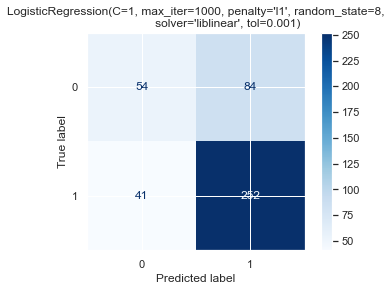

In [54]:
print_metrics(log_model_2, X_train_scaled, y_train, X_test_scaled, y_test)

In [57]:
log_reg_2 = add_grid(log_model_2, X_test_scaled, y_test, log_reg, model_name='LogReg L1')

log_reg_2

,Model Name,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Baseline LogReg,0.709977,0.757669,0.843003,0.798061
0,LogReg L1,0.709977,0.750000,0.860068,0.801272


Our accurcay score stayed exactly the same, but we improved our F-1 score. Let's see if we can beat that.

In [58]:
# Definite a log_param_grid
log_L2_param_grid = {'penalty': ['l2'],
                     'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs', 'sag'],
                     'tol': [0.001, 0.01, 0.1],
                     'max_iter': [1000, 10000],
                     'C': [1, 100, 10000]
                    }

In [59]:
# Instantiate Logistic Regression
log_reg = LogisticRegression(random_state=8)

# Instantiate GridSearchCV
grid_log_l2 = GridSearchCV(log_reg, log_L2_param_grid, scoring='accuracy')

# Fit to the data
grid_log_l2.fit(X_train_scaled, y_train)

C:\Users\kevgr\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kevgr\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

GridSearchCV(estimator=LogisticRegression(random_state=8),
             param_grid={'C': [1, 100, 10000], 'max_iter': [1000, 10000],
                         'penalty': ['l2'],
                         'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs',
                                    'sag'],
                         'tol': [0.001, 0.01, 0.1]},
             scoring='accuracy')

In [60]:
# Look at the best parameters from our GridSearchCV
grid_log_l2.best_params_

{'C': 100,
 'max_iter': 1000,
 'penalty': 'l2',
 'solver': 'liblinear',
 'tol': 0.1}

In [61]:
# Instantiate a LogisticRegression
log_model_3 = LogisticRegression(penalty='l2', max_iter=1000, C=100, solver='liblinear', tol=0.1, random_state=8)

# Fit the model
log_model_3.fit(X_train_scaled, y_train)

LogisticRegression(C=100, max_iter=1000, random_state=8, solver='liblinear',
                   tol=0.1)

Training Precision:  0.8139773895169579
Testing Precision:  0.7538940809968847


Training Recall:  0.9030786773090079
Testing Recall:  0.825938566552901


Training Accuracy:  0.7937984496124031
Testing Accuracy:  0.6983758700696056


Training F1-Score:  0.8562162162162162
Testing F1-Score:  0.7882736156351792


Classification Report: 
               precision    recall  f1-score   support

           0       0.54      0.43      0.48       138
           1       0.75      0.83      0.79       293

    accuracy                           0.70       431
   macro avg       0.65      0.63      0.63       431
weighted avg       0.68      0.70      0.69       431



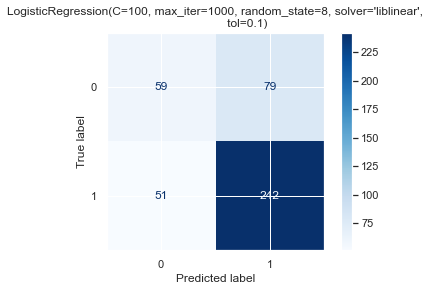

In [62]:
print_metrics(log_model_3, X_train_scaled, y_train, X_test_scaled, y_test)

In [64]:
log_reg_3 = add_grid(log_model_3, X_test_scaled, y_test, log_reg_2, model_name='LogReg L2')

log_reg_3

,Model Name,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Baseline LogReg,0.709977,0.757669,0.843003,0.798061
0,LogReg L1,0.709977,0.750000,0.860068,0.801272
0,LogReg L2,0.698376,0.753894,0.825939,0.788274


Our accuracy score actually got worse in this model. Let's move onto a new model.

## 4. Build a Baseline kNN Model

In [65]:
# Creating the model
knn_baseline_model = KNeighborsClassifier()

# Fit the model
knn_baseline_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

Training Precision:  0.7715686274509804
Testing Precision:  0.7088235294117647


Training Recall:  0.8973774230330672
Testing Recall:  0.8225255972696246


Training Accuracy:  0.7496124031007751
Testing Accuracy:  0.6496519721577726


Training F1-Score:  0.8297311544544017
Testing F1-Score:  0.7614533965244865


Classification Report: 
               precision    recall  f1-score   support

           0       0.43      0.28      0.34       138
           1       0.71      0.82      0.76       293

    accuracy                           0.65       431
   macro avg       0.57      0.55      0.55       431
weighted avg       0.62      0.65      0.63       431



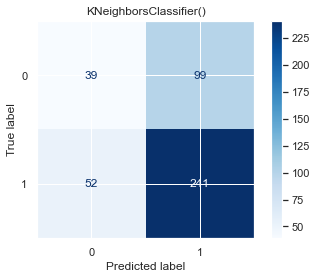

In [66]:
print_metrics(knn_baseline_model, X_train_scaled, y_train, X_test_scaled, y_test)

In [67]:
knn_1 = add_grid(knn_baseline_model, X_test_scaled, y_test, log_reg_3, model_name='Baseline KNN')

knn_1

,Model Name,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Baseline LogReg,0.709977,0.757669,0.843003,0.798061
0,LogReg L1,0.709977,0.750000,0.860068,0.801272
0,LogReg L2,0.698376,0.753894,0.825939,0.788274
0,Baseline KNN,0.649652,0.708824,0.822526,0.761453


As we can tell, this baseline kNN model did not do as well as the baseline logistic regression model nor the logistic regression model with hypertuning. Maybe if we apply some tuning to it, we will be able to beat the logistic regression model. 

## 5. Build Iterative Models to Find the Best kNN Model

In [68]:
# Definite a kNN_param_grid
kNN_param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 13, 15],
                     'metric': ['minkowski', 'manhattan', 'euclidean'],
                     'weights': ['uniform', 'distance'],
                     'leaf_size': [1, 2, 3, 5, 7, 9]
                    }

In [69]:
# Instantiate Logistic Regression
kNN_reg = KNeighborsClassifier()

# Instantiate GridSearchCV
kNN_grid = GridSearchCV(kNN_reg, kNN_param_grid, scoring='accuracy')

# Fit to the data
kNN_grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 5, 7, 9],
                         'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': [1, 3, 5, 7, 9, 13, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [70]:
# Look at the best parameters from our GridSearchCV
kNN_grid.best_params_

{'leaf_size': 1,
 'metric': 'manhattan',
 'n_neighbors': 15,
 'weights': 'uniform'}

In [71]:
# Instatiate a model with the best parameters
knn_model_2 = KNeighborsClassifier(leaf_size=1, metric='manhattan', n_neighbors=15, weights='uniform')

# Fit the model on our data
knn_model_2.fit(X_train_scaled, y_train)

KNeighborsClassifier(leaf_size=1, metric='manhattan', n_neighbors=15)

Training Precision:  0.7179269328802039
Testing Precision:  0.7002518891687658


Training Recall:  0.9635119726339795
Testing Recall:  0.9488054607508533


Training Accuracy:  0.7178294573643411
Testing Accuracy:  0.6890951276102089


Training F1-Score:  0.8227848101265823
Testing F1-Score:  0.8057971014492753


Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.14      0.22       138
           1       0.70      0.95      0.81       293

    accuracy                           0.69       431
   macro avg       0.63      0.54      0.51       431
weighted avg       0.65      0.69      0.62       431



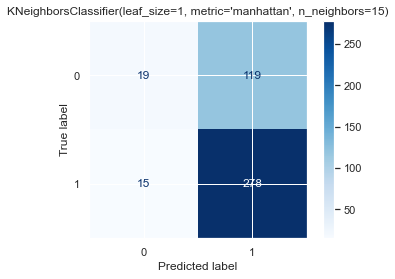

In [72]:
print_metrics(knn_model_2, X_train_scaled, y_train, X_test_scaled, y_test)

In [73]:
knn_2 = add_grid(knn_model_2, X_test_scaled, y_test, knn_1, model_name='KNN Model 2')

knn_2

,Model Name,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Baseline LogReg,0.709977,0.757669,0.843003,0.798061
0,LogReg L1,0.709977,0.750000,0.860068,0.801272
0,LogReg L2,0.698376,0.753894,0.825939,0.788274
0,Baseline KNN,0.649652,0.708824,0.822526,0.761453
0,KNN Model 2,0.689095,0.700252,0.948805,0.805797


While our accuracy score did get better, we still didn't do as well as the logistic regression model. Let's move on to a new type of model.

## 6. Build a Baseline Decision Tree Model


In [74]:
# Create the model
dtc_baseline_model = DecisionTreeClassifier(random_state=8)

# Fit the model
dtc_baseline_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=8)

Training Precision:  1.0
Testing Precision:  0.7632508833922261


Training Recall:  1.0
Testing Recall:  0.7372013651877133


Training Accuracy:  1.0
Testing Accuracy:  0.665893271461717


Training F1-Score:  1.0
Testing F1-Score:  0.7499999999999999


Classification Report: 
               precision    recall  f1-score   support

           0       0.48      0.51      0.50       138
           1       0.76      0.74      0.75       293

    accuracy                           0.67       431
   macro avg       0.62      0.63      0.62       431
weighted avg       0.67      0.67      0.67       431



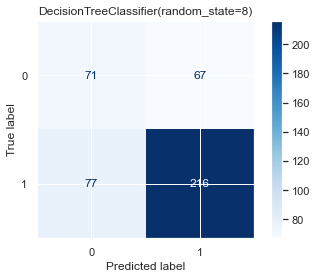

In [75]:
print_metrics(dtc_baseline_model, X_train, y_train, X_test, y_test)

In [83]:
dtc_1 = add_grid(dtc_baseline_model, X_test, y_test, knn_2, model_name='Baseline DTC')

dtc_1

,Model Name,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Baseline LogReg,0.709977,0.757669,0.843003,0.798061
0,LogReg L1,0.709977,0.750000,0.860068,0.801272
0,LogReg L2,0.698376,0.753894,0.825939,0.788274
0,Baseline KNN,0.649652,0.708824,0.822526,0.761453
0,KNN Model 2,0.689095,0.700252,0.948805,0.805797
0,Baseline DTC,0.665893,0.763251,0.737201,0.750000


This baseline Decision Tree model did worse than our other models. We can probably assume that the model is overfitting since we have not 'pruned' it at all. Let's see if we can improve it.

## 7. Build Iterative Models to Find the Best Decision Tree Model

In [77]:
# Definite a dtc_param_grid
dtc_param_grid = {'criterion': ['gini', 'entropy'],
                     'max_depth': [1, 5, 10],
                     'min_samples_split': [2, 5, 10],
                     'min_samples_leaf': [1, 5, 10],
                     'max_features': [1, 3, 5]
                    }

In [78]:
# Instantiate Decision Tree
dtc_1 = DecisionTreeClassifier(random_state=8)

# Instantiate GridSearchCV
dtc_grid_1 = GridSearchCV(dtc_1, dtc_param_grid, scoring='accuracy')

# Fit to the data
dtc_grid_1.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=8),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10], 'max_features': [1, 3, 5],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [79]:
# Look at the best parameters from our GridSearchCV
dtc_grid_1.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [80]:
# Instantiate a DecisionTreeClassifier With The Results From Above
dtc_model_1 = DecisionTreeClassifier(criterion='gini', max_depth=10, max_features=3, 
                                 min_samples_leaf=1, min_samples_split=5, random_state=8)

dtc_model_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features=3, min_samples_split=5,
                       random_state=8)

Training Precision:  0.7678391959798995
Testing Precision:  0.7327044025157232


Training Recall:  0.87115165336374
Testing Recall:  0.7952218430034129


Training Accuracy:  0.7333333333333333
Testing Accuracy:  0.6635730858468677


Training F1-Score:  0.8162393162393161
Testing F1-Score:  0.7626841243862521


Classification Report: 
               precision    recall  f1-score   support

           0       0.47      0.38      0.42       138
           1       0.73      0.80      0.76       293

    accuracy                           0.66       431
   macro avg       0.60      0.59      0.59       431
weighted avg       0.65      0.66      0.65       431



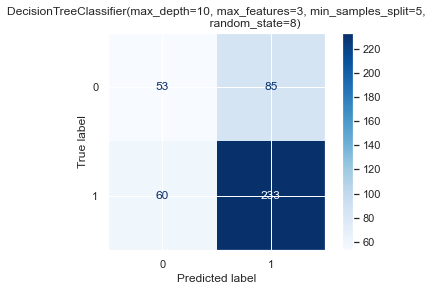

In [81]:
print_metrics(dtc_model_1, X_train, y_train, X_test, y_test)

In [84]:
dtc_2 = add_grid(dtc_model_1, X_test, y_test, dtc_1, model_name='DTC Model 2')

dtc_2

,Model Name,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Baseline LogReg,0.709977,0.757669,0.843003,0.798061
0,LogReg L1,0.709977,0.750000,0.860068,0.801272
0,LogReg L2,0.698376,0.753894,0.825939,0.788274
0,Baseline KNN,0.649652,0.708824,0.822526,0.761453
0,KNN Model 2,0.689095,0.700252,0.948805,0.805797
0,Baseline DTC,0.665893,0.763251,0.737201,0.750000
0,DTC Model 2,0.663573,0.732704,0.795222,0.762684


Our training data and testing data are in line with one another but we still are not testing at a great rate. Let's try some different parameters in our DTC grid.

In [85]:
# Definite a dtc_param_grid
dtc_param_grid_2 = {'criterion': ['gini', 'entropy'],
                     'max_depth': [5, 10, 15, 20],
                     'min_samples_split': [5, 10, 15],
                     'min_samples_leaf': [5, 10, 15],
                     'max_features': [5, 7, 9, 10, 11]
                    }

In [86]:
# Instantiate Decision Tree
dtc_model_2 = DecisionTreeClassifier(random_state=8)

# Instantiate GridSearchCV
dtc_grid_2 = GridSearchCV(dtc_model_2, dtc_param_grid_2, scoring='accuracy')

# Fit to the data
dtc_grid_2.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=8),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'max_features': [5, 7, 9, 10, 11],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [5, 10, 15]},
             scoring='accuracy')

In [87]:
# Look at the best parameters from our GridSearchCV
dtc_grid_2.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 11,
 'min_samples_leaf': 5,
 'min_samples_split': 15}

In [88]:
# Instantiate a DecisionTreeClassifier With The Results From Above
dtc_model_2 = DecisionTreeClassifier(criterion='gini', max_depth=10, max_features=11, 
                                 min_samples_leaf=5, min_samples_split=15, random_state=8)

dtc_model_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features=11, min_samples_leaf=5,
                       min_samples_split=15, random_state=8)

Training Precision:  0.7821989528795812
Testing Precision:  0.7098765432098766


Training Recall:  0.8517673888255416
Testing Recall:  0.7849829351535836


Training Accuracy:  0.737984496124031
Testing Accuracy:  0.6357308584686775


Training F1-Score:  0.8155021834061136
Testing F1-Score:  0.7455429497568882


Classification Report: 
               precision    recall  f1-score   support

           0       0.41      0.32      0.36       138
           1       0.71      0.78      0.75       293

    accuracy                           0.64       431
   macro avg       0.56      0.55      0.55       431
weighted avg       0.61      0.64      0.62       431



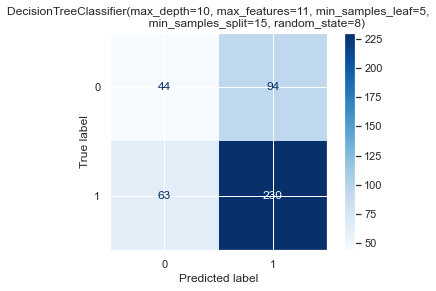

In [89]:
print_metrics(dtc_model_2, X_train, y_train, X_test, y_test)

In [90]:
dtc_3 = add_grid(dtc_model_2, X_test, y_test, dtc_2, model_name='DTC Model 3')

dtc_3

,Model Name,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Baseline LogReg,0.709977,0.757669,0.843003,0.798061
0,LogReg L1,0.709977,0.750000,0.860068,0.801272
0,LogReg L2,0.698376,0.753894,0.825939,0.788274
0,Baseline KNN,0.649652,0.708824,0.822526,0.761453
0,KNN Model 2,0.689095,0.700252,0.948805,0.805797
0,Baseline DTC,0.665893,0.763251,0.737201,0.750000
0,DTC Model 2,0.663573,0.732704,0.795222,0.762684
0,DTC Model 3,0.635731,0.709877,0.784983,0.745543


Unfortunately this model did even worse. Let's move on to a new type of model.

## 8. Build a Baseline Random Forest Model


In [91]:
# Create the model
rf_baseline_model = RandomForestClassifier(random_state=8)

# Fit the model
rf_baseline_model.fit(X_train, y_train)

RandomForestClassifier(random_state=8)

Training Precision:  1.0
Testing Precision:  0.7109375


Training Recall:  1.0
Testing Recall:  0.931740614334471


Training Accuracy:  1.0
Testing Accuracy:  0.6960556844547564


Training F1-Score:  1.0
Testing F1-Score:  0.8064992614475628


Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.20      0.29       138
           1       0.71      0.93      0.81       293

    accuracy                           0.70       431
   macro avg       0.64      0.56      0.55       431
weighted avg       0.67      0.70      0.64       431



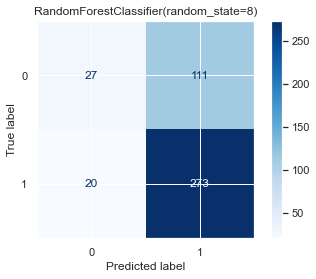

In [92]:
print_metrics(rf_baseline_model, X_train, y_train, X_test, y_test)

In [93]:
rf_1 = add_grid(rf_baseline_model, X_test, y_test, dtc_3, model_name='Baseline RF')

rf_1

,Model Name,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Baseline LogReg,0.709977,0.757669,0.843003,0.798061
0,LogReg L1,0.709977,0.750000,0.860068,0.801272
0,LogReg L2,0.698376,0.753894,0.825939,0.788274
0,Baseline KNN,0.649652,0.708824,0.822526,0.761453
0,KNN Model 2,0.689095,0.700252,0.948805,0.805797
0,Baseline DTC,0.665893,0.763251,0.737201,0.750000
0,DTC Model 2,0.663573,0.732704,0.795222,0.762684
0,DTC Model 3,0.635731,0.709877,0.784983,0.745543
0,Baseline RF,0.696056,0.710938,0.931741,0.806499


We can tell that immediately we had a pretty high accuracy score, but we are defintely overfitting. Let's try pruning our tree to get a better model.

## 9. Build Iterative Models to Find the Best Random Forest Model

In [94]:
# Definite a rf_param_grid
rf_param_grid_1 = {'criterion': ['gini', 'entropy'],
                   'n_estimators': [50, 100, 150],
                     'max_depth': [2, 10, 15],
                     'min_samples_split': [2, 5, 7, 15],
                     'min_samples_leaf': [1, 5, 10, 15],
                     'max_features': [1, 3, 5, 10]
                    }

In [95]:
# Instantiate Decision Tree
rf_model_1 = RandomForestClassifier(random_state=8)

# Instantiate GridSearchCV
rf_grid_1 = GridSearchCV(rf_model_1, rf_param_grid_1, scoring='accuracy')

# Fit to the data
rf_grid_1.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=8),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 10, 15],
                         'max_features': [1, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 10, 15],
                         'min_samples_split': [2, 5, 7, 15],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [96]:
# Look at the best parameters from our GridSearchCV
rf_grid_1.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 150}

In [97]:
# Instantiate a RandomForestClassifier With The Results From Above
rf_model_1 = RandomForestClassifier(criterion='gini', max_depth=15, max_features=10, 
                                 min_samples_leaf=1, min_samples_split=15, n_estimators=150, random_state=8)

rf_model_1.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, max_features=10, min_samples_split=15,
                       n_estimators=150, random_state=8)

Training Precision:  0.7996306555863343
Testing Precision:  0.697560975609756


Training Recall:  0.9874572405929305
Testing Recall:  0.9761092150170648


Training Accuracy:  0.8232558139534883
Testing Accuracy:  0.6960556844547564


Training F1-Score:  0.8836734693877552
Testing F1-Score:  0.8136557610241819


Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.10      0.18       138
           1       0.70      0.98      0.81       293

    accuracy                           0.70       431
   macro avg       0.68      0.54      0.49       431
weighted avg       0.69      0.70      0.61       431



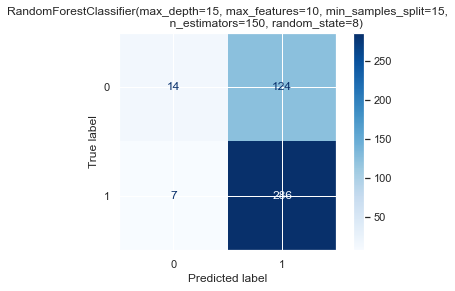

In [98]:
print_metrics(rf_model_1, X_train, y_train, X_test, y_test)

In [99]:
rf_2 = add_grid(rf_model_1, X_test, y_test, rf_1, model_name='RF Model 2')

rf_2

,Model Name,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Baseline LogReg,0.709977,0.757669,0.843003,0.798061
0,LogReg L1,0.709977,0.750000,0.860068,0.801272
0,LogReg L2,0.698376,0.753894,0.825939,0.788274
0,Baseline KNN,0.649652,0.708824,0.822526,0.761453
0,KNN Model 2,0.689095,0.700252,0.948805,0.805797
0,Baseline DTC,0.665893,0.763251,0.737201,0.750000
0,DTC Model 2,0.663573,0.732704,0.795222,0.762684
0,DTC Model 3,0.635731,0.709877,0.784983,0.745543
0,Baseline RF,0.696056,0.710938,0.931741,0.806499
0,RF Model 2,0.696056,0.697561,0.976109,0.813656


In [100]:
print(rf_2.to_markdown(index=False))

| Model Name      |   Accuracy Score |   Precision Score |   Recall Score |   F1 Score |
|:----------------|-----------------:|------------------:|---------------:|-----------:|
| Baseline LogReg |         0.709977 |          0.757669 |       0.843003 |   0.798061 |
| LogReg L1       |         0.709977 |          0.75     |       0.860068 |   0.801272 |
| LogReg L2       |         0.698376 |          0.753894 |       0.825939 |   0.788274 |
| Baseline KNN    |         0.649652 |          0.708824 |       0.822526 |   0.761453 |
| KNN Model 2     |         0.689095 |          0.700252 |       0.948805 |   0.805797 |
| Baseline DTC    |         0.665893 |          0.763251 |       0.737201 |   0.75     |
| DTC Model 2     |         0.663573 |          0.732704 |       0.795222 |   0.762684 |
| DTC Model 3     |         0.635731 |          0.709877 |       0.784983 |   0.745543 |
| Baseline RF     |         0.696056 |          0.710938 |       0.931741 |   0.806499 |
| RF Model 2      |  

## 10. Choose and Evaluate an Overall Best Model

It seems like our best model is the second logistic regression model.

In [101]:
# Instantiate a LogisticRegression
final_model = LogisticRegression(penalty='l1', max_iter=1000, C=1, solver='liblinear', tol=0.001, random_state=8)

final_model.fit(X_train_scaled, y_train)

LogisticRegression(C=1, max_iter=1000, penalty='l1', random_state=8,
                   solver='liblinear', tol=0.001)

Training Precision:  0.8130745658835546
Testing Precision:  0.75


Training Recall:  0.9076396807297605
Testing Recall:  0.8600682593856656


Training Accuracy:  0.7953488372093023
Testing Accuracy:  0.7099767981438515


Training F1-Score:  0.8577586206896551
Testing F1-Score:  0.8012718600953896


Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.39      0.46       138
           1       0.75      0.86      0.80       293

    accuracy                           0.71       431
   macro avg       0.66      0.63      0.63       431
weighted avg       0.69      0.71      0.69       431



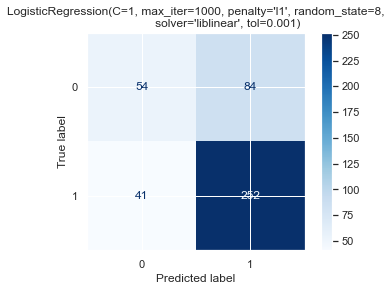

In [102]:
print_metrics(final_model, X_train_scaled, y_train, X_test_scaled, y_test)

This model has 71% accuracy meaning that it correctly predcits that a player was drafted 71% of the time. This is better than our combine final model which had an accuracy of 67.8%. Additionally, our original 'dummy' model had an accuracy of 64.8% so we also beat that.

# Findings and Reccomendations

As stated above, our model is accurate about 71% of the time. This means that just by looking at a potiental draft pick's stats, teams can figure out more often than not that a player will or will not be drafted. 

With this data, NFL teams can avoid multi-million dollar mistakes by weeding out players from their draft board who should not be drafted. If people in the front office are very adamant about drafting a player who has poor statistics, the data team can show them how people have not been drafted in the past and can be either picked up in free agency or later in the draft.

## Conclusion

In conclusion, it is very hard to predict whether a player will be drafted based purely on their combine stats. This makes sense for a few intuitive reasons:

1. There is a lot more that goes into whether a player is drafted than purely their physical attributes. For example, a wide reciever can run extremely fast and be extremely agile, but if they can't catch the ball or run the right routes, they will not be drafted.
2. Every position in football is extremely different. Some positions require physical strength while others require more mental ability. Without having mental testing regulations on hand, it is hard to say how someone will perform.
3. The combine invites only the best of the best, meaning that all of these players were the best at their position in college. Sometimes the gap between people is extremely marginal.

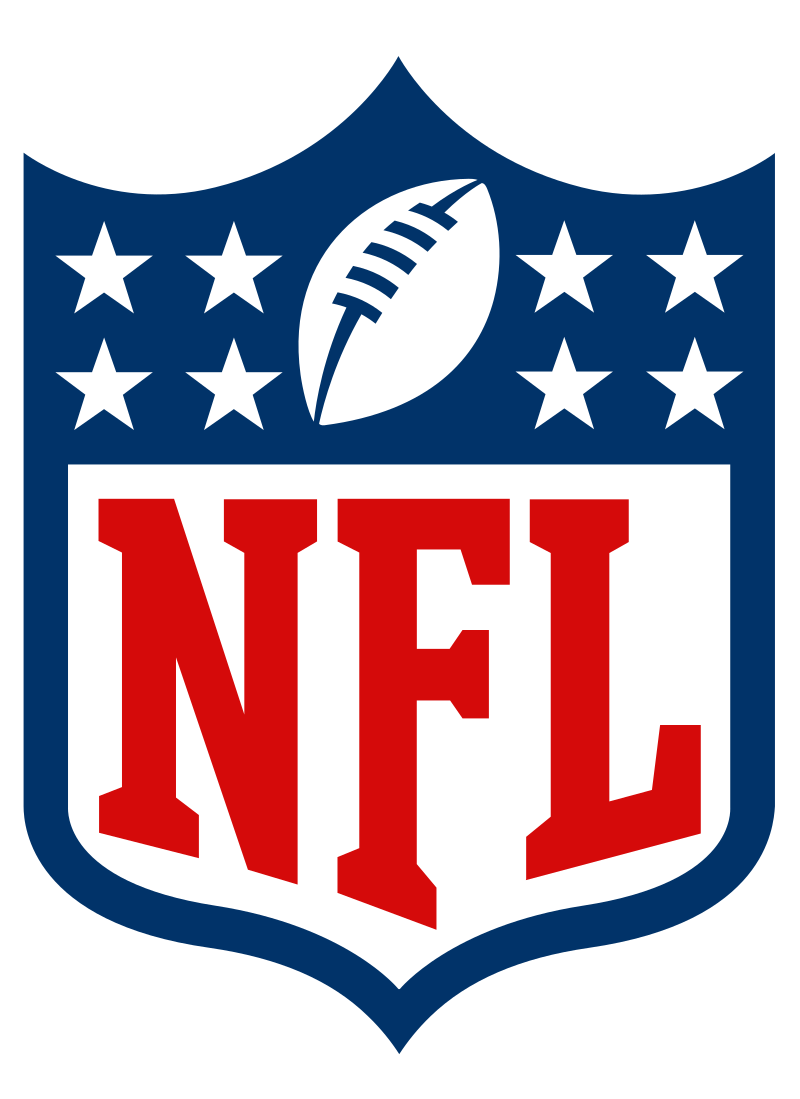